In [23]:
# import statements
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import utilities

sns.set()

train_values = pd.read_csv('./data/train_values.csv') 
train_labels = pd.read_csv('./data/train_labels.csv') 

train_df = train_values.merge(train_labels, on='row_id', how='inner')
train_df.head(5)

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,0,3,1,1,1,70.0,3,18,37,246,...,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1
1,1,1,1,3,1,178.0,3,369,52,299,...,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0
2,2,2,1,3,1,163.0,3,16,10,306,...,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1
3,3,1,1,1,1,155.0,1,305,47,180,...,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1
4,4,1,1,1,1,305.0,3,24,37,20,...,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1


In [24]:
train_df.dtypes
#train_df.info()

row_id                              int64
loan_type                           int64
property_type                       int64
loan_purpose                        int64
occupancy                           int64
loan_amount                       float64
preapproval                         int64
msa_md                              int64
state_code                          int64
county_code                         int64
applicant_ethnicity                 int64
applicant_race                      int64
applicant_sex                       int64
applicant_income                  float64
population                        float64
minority_population_pct           float64
ffiecmedian_family_income         float64
tract_to_msa_md_income_pct        float64
number_of_owner-occupied_units    float64
number_of_1_to_4_family_units     float64
lender                              int64
co_applicant                         bool
accepted                            int64
dtype: object

In [25]:
train_df.describe()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,accepted
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,...,500000.000000,460052.000000,477535.000000,477534.000000,477560.000000,477486.000000,477435.000000,477470.000000,500000.000000,500000.000000
mean,249999.500000,1.366276,1.047650,2.066810,1.109590,221.753158,2.764722,181.606972,23.726924,144.542062,...,1.462374,102.389521,5416.833956,31.617310,69235.603298,91.832624,1427.718282,1886.147065,3720.121344,0.500228
std,144337.711635,0.690555,0.231404,0.948371,0.326092,590.641648,0.543061,138.464169,15.982768,100.243612,...,0.677685,153.534496,2728.144999,26.333938,14810.058791,14.210924,737.559511,914.123744,1838.313175,0.500000
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,14.000000,0.534000,17858.000000,3.981000,4.000000,1.000000,0.000000,0.000000
25%,124999.750000,1.000000,1.000000,1.000000,1.000000,93.000000,3.000000,25.000000,6.000000,57.000000,...,1.000000,47.000000,3744.000000,10.700000,59731.000000,88.067250,944.000000,1301.000000,2442.000000,0.000000
50%,249999.500000,1.000000,1.000000,2.000000,1.000000,162.000000,3.000000,192.000000,26.000000,131.000000,...,1.000000,74.000000,4975.000000,22.901000,67526.000000,100.000000,1327.000000,1753.000000,3731.000000,1.000000
75%,374999.250000,2.000000,1.000000,3.000000,1.000000,266.000000,3.000000,314.000000,37.000000,246.000000,...,2.000000,117.000000,6467.000000,46.020000,75351.000000,100.000000,1780.000000,2309.000000,5436.000000,1.000000
max,499999.000000,4.000000,3.000000,3.000000,3.000000,100878.000000,3.000000,408.000000,52.000000,324.000000,...,4.000000,10139.000000,37097.000000,100.000000,125248.000000,100.000000,8771.000000,13623.000000,6508.000000,1.000000


In [26]:
# start off simple - drop the NAs
df = train_df.dropna() 

# set the co_applicant to int for histograms
df['co_applicant'] = df['co_applicant'].astype(int)
df.info()

# get more sophisitcated later
utilities.remove_cols_with_perc_missing_values(train_df, .1)
print('done!')

C:\Users\BenMcC\AppData\Local\conda\conda\envs\mortgage-classifier-capstone\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


<class 'pandas.core.frame.DataFrame'>
Int64Index: 438255 entries, 0 to 499999
Data columns (total 23 columns):
row_id                            438255 non-null int64
loan_type                         438255 non-null int64
property_type                     438255 non-null int64
loan_purpose                      438255 non-null int64
occupancy                         438255 non-null int64
loan_amount                       438255 non-null float64
preapproval                       438255 non-null int64
msa_md                            438255 non-null int64
state_code                        438255 non-null int64
county_code                       438255 non-null int64
applicant_ethnicity               438255 non-null int64
applicant_race                    438255 non-null int64
applicant_sex                     438255 non-null int64
applicant_income                  438255 non-null float64
population                        438255 non-null float64
minority_population_pct           438255 no

In [27]:
# make some additional categorical columns for some quick Eexploratory data analysis

# loan_type
loan_type_dict = {'1':'Conventional', '2':'FHA-Insured', '3':'VA-guarenteed', '4':'FSA/RHS'}
utilities.factor_int_column_with_keys(df, 'loan_type', loan_type_dict)

# property type
property_type_dict = {'1':'1 to 4 Family - non manufactured', 
                      '2':'Manufactured Housing',
                      '3':'Multifamily'}
utilities.factor_int_column_with_keys(df, 'property_type', property_type_dict)

# loan purpose
loan_purpose_dict = {'1':'Home purchase',
                      '2':'Home improvement',
                      '3':'Refinancing'}
utilities.factor_int_column_with_keys(df, 'loan_purpose', loan_purpose_dict)

# occupancy
occupancy_dict = {'1':'Owner Occupied',
                  '2':'Not owner-occupied',
                  '3': None}
utilities.factor_int_column_with_keys(df, 'occupancy', occupancy_dict)

# preapproval
preapproval_dict = {'1':'Requested',
                    '2':'Not Requested',
                    '3':None}
utilities.factor_int_column_with_keys(df, 'preapproval', preapproval_dict)

# applicant_ethnicity 
app_ethnicity_dict = {'1':'Hispanic',
                  '2':'Not Hispanic',
                  '3':None,
                  '4':None,
                  '5':None}
utilities.factor_int_column_with_keys(df, 'applicant_ethnicity', app_ethnicity_dict)

# applicant_race 
app_race_dict = {'1':'American Indian',
                '2':'Asian',
                 '3':'African American',
                 '4':'Pacific Islander',
                 '5':'White',
                 '6':None,
                 '7':None,
                 '8':None}
utilities.factor_int_column_with_keys(df, 'applicant_race', app_race_dict)

# applicant_sex 
app_gender_dict = {'1':'Male',
                   '2':'Female',
                   '3':None,
                   '4':None}
utilities.factor_int_column_with_keys(df, 'applicant_sex', app_gender_dict)

# look for -1 in 
# msa_md, state_code, country_code
df.head(5)

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,co_applicant,accepted,loan_type_str,property_type_str,loan_purpose_str,occupancy_str,preapproval_str,applicant_ethnicity_str,applicant_race_str,applicant_sex_str
0,0,3,1,1,1,70.0,3,18,37,246,...,0,1,VA-guarenteed,1 to 4 Family - non manufactured,Home purchase,Owner Occupied,None,Not Hispanic,White,Male
1,1,1,1,3,1,178.0,3,369,52,299,...,0,0,Conventional,1 to 4 Family - non manufactured,Refinancing,Owner Occupied,None,Hispanic,White,Male
2,2,2,1,3,1,163.0,3,16,10,306,...,0,1,FHA-Insured,1 to 4 Family - non manufactured,Refinancing,Owner Occupied,None,Not Hispanic,White,Male
3,3,1,1,1,1,155.0,1,305,47,180,...,1,1,Conventional,1 to 4 Family - non manufactured,Home purchase,Owner Occupied,Requested,Not Hispanic,White,Male
4,4,1,1,1,1,305.0,3,24,37,20,...,0,1,Conventional,1 to 4 Family - non manufactured,Home purchase,Owner Occupied,None,Not Hispanic,African American,Female


In [28]:
'''
loan_type                         438255 non-null int64
property_type                     438255 non-null int64
loan_purpose                      438255 non-null int64
occupancy                         438255 non-null int64
loan_amount                       438255 non-null float64
preapproval                       438255 non-null int64
msa_md                            438255 non-null int64
state_code                        438255 non-null int64
county_code                       438255 non-null int64
applicant_ethnicity               438255 non-null int64
applicant_race                    438255 non-null int64
applicant_sex                     438255 non-null int64
applicant_income                  438255 non-null float64
population                        438255 non-null float64
minority_population_pct           438255 non-null float64
ffiecmedian_family_income         438255 non-null float64
tract_to_msa_md_income_pct        438255 non-null float64
number_of_owner-occupied_units    438255 non-null float64
number_of_1_to_4_family_units     438255 non-null float64
lender                            438255 non-null int64
co_applicant                      438255 non-null int32
accepted                          438255 non-null int64'''

print('a')

a


In [29]:

def compare_category_to_label(df, label_col, label_category):
    _grouped_df = df.groupby(by=label_category)[label_col].value_counts()
    return pd.crosstab(_grouped_df[label_category], _grouped_df[label_col], normalize='index')

df.head(5)

#compare_category_to_label(df, 'accepted', 'loan_type_str')
#compare_category_to_label(df, 'accepted', 'loan_type_str')

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,co_applicant,accepted,loan_type_str,property_type_str,loan_purpose_str,occupancy_str,preapproval_str,applicant_ethnicity_str,applicant_race_str,applicant_sex_str
0,0,3,1,1,1,70.0,3,18,37,246,...,0,1,VA-guarenteed,1 to 4 Family - non manufactured,Home purchase,Owner Occupied,None,Not Hispanic,White,Male
1,1,1,1,3,1,178.0,3,369,52,299,...,0,0,Conventional,1 to 4 Family - non manufactured,Refinancing,Owner Occupied,None,Hispanic,White,Male
2,2,2,1,3,1,163.0,3,16,10,306,...,0,1,FHA-Insured,1 to 4 Family - non manufactured,Refinancing,Owner Occupied,None,Not Hispanic,White,Male
3,3,1,1,1,1,155.0,1,305,47,180,...,1,1,Conventional,1 to 4 Family - non manufactured,Home purchase,Owner Occupied,Requested,Not Hispanic,White,Male
4,4,1,1,1,1,305.0,3,24,37,20,...,0,1,Conventional,1 to 4 Family - non manufactured,Home purchase,Owner Occupied,None,Not Hispanic,African American,Female


In [30]:
# run once to sort out anything without a lot of difference between 0 and 1
'''
cols = ['property_type_str', 'loan_type_str', 'loan_purpose_str', 'occupancy_str', 
        'preapproval_str', 'applicant_ethnicity_str', 'applicant_race_str','applicant_sex_str' ]

for c in cols:
    print(pd.crosstab(df[c],df['accepted'], normalize='index'))
    print('   ---   ')
'''
pd.crosstab(df['loan_purpose_str'],df['accepted'], normalize='index')

accepted,0,1
loan_purpose_str,,
Home improvement,0.672993,0.327007
Home purchase,0.341775,0.658225
Refinancing,0.557442,0.442558


In [31]:
pd.crosstab(df['loan_type_str'],df['accepted'], normalize='index')

accepted,0,1
loan_type_str,,
Conventional,0.482419,0.517581
FHA-Insured,0.479492,0.520508
FSA/RHS,0.372312,0.627688
VA-guarenteed,0.471227,0.528773


In [32]:
pd.crosstab(df['preapproval_str'],df['accepted'], normalize='index')

accepted,0,1
preapproval_str,,
Not Requested,0.332097,0.667903
Requested,0.314854,0.685146


In [33]:
pd.crosstab(df['applicant_race_str'],df['accepted'], normalize='index')

accepted,0,1
applicant_race_str,,
African American,0.660436,0.339564
American Indian,0.644031,0.355969
Asian,0.439786,0.560214
Pacific Islander,0.565842,0.434158
White,0.446549,0.553451


In [34]:
pd.crosstab(df['applicant_race_str'],df['accepted'], normalize='index')

accepted,0,1
applicant_race_str,,
African American,0.660436,0.339564
American Indian,0.644031,0.355969
Asian,0.439786,0.560214
Pacific Islander,0.565842,0.434158
White,0.446549,0.553451


In [35]:
pd.crosstab(df['applicant_sex_str'],df['accepted'], normalize='index')

accepted,0,1
applicant_sex_str,,
Female,0.507799,0.492201
Male,0.457428,0.542572


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)

rescaledX = scaler.transform(X)

In [36]:
# normalize! Columns to consider
# loan_amount, applicant_oncome, population, FFIEC median family income, number of owner occupied units, number of 1to4 units

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026FD33CABA8>,
      dtype=object)

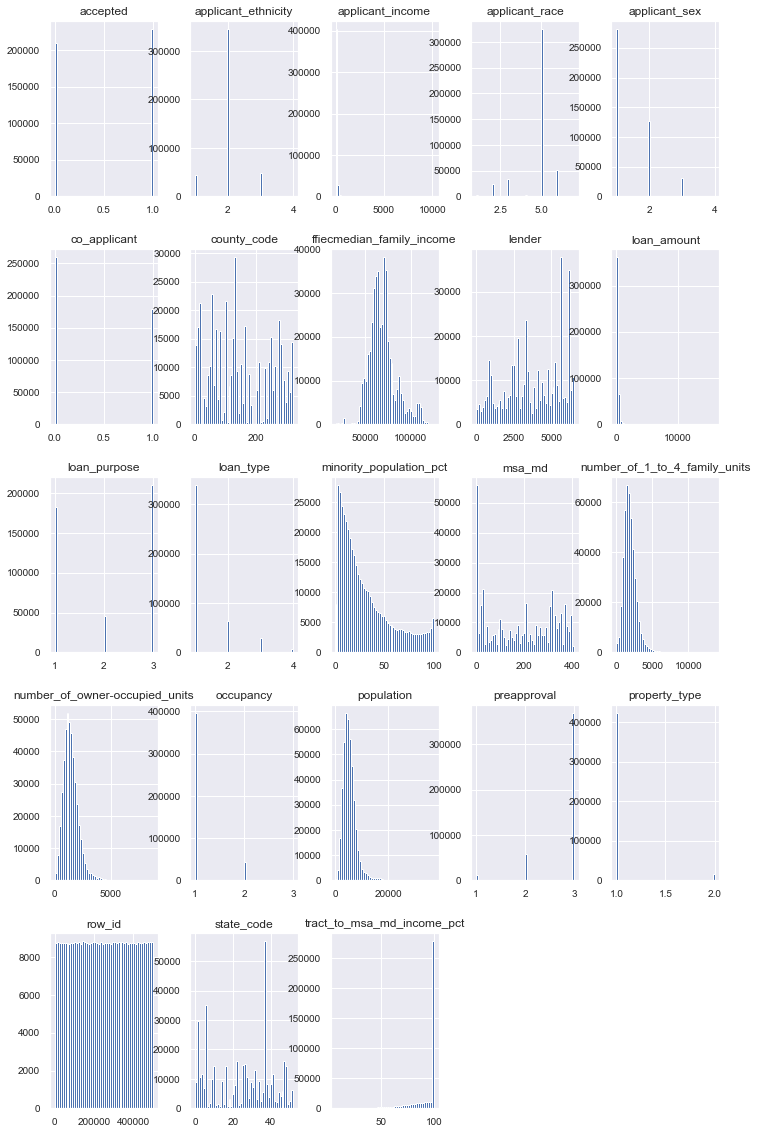

In [37]:

sns.set()
num_bins = 50 #int(math.sqrt(len(df)))
df.hist(figsize=(12,20), bins=num_bins, xlabelsize=10, ylabelsize=10)
